In [1]:
# import stuff
#General
import importlib

#My Code
import io_manager as io
import plot_moments
from pars_shocks import Pars
import my_toolbox as tb
import tables
import main
import numpy as np
import model_uncert as model
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import pars_shocks as ps

import time
import main
import importlib
importlib.reload(main)

importlib.reload(tb)

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
out_path = main_path + "trans_output_test/"
of_name = None

trans_path = main_path + "input/MH_trans/" # this is still here so that some of the legacy code below still runs, but it is confusing. 
bench_trans_path = main_path + "input/k-means/MH_trans_by_MH_clust_age.csv"

myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, 
                                                                    H_trans_path = bench_trans_path, output_flag = False)
myPars = myPars_bench




*****Running main_io with default out_folder_name*****
Solver ran in 7.210145900025964 seconds
Calibrating with alpha_lab_targ = 0.30498119901960785, w0_mean_targ = 12.664071, w0_sd_targ = 3.1353517, w1_targ = 0.25679965942280614, w2_targ = 0.2029180155568051, wH_targ = 0.028003097
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 *****
***** Calibration iteration 9 *****
***** Calibration iteration 10 *****
Calibration converged after 11 iterations
w0_weights = [0.0488244  0.42637316 0.50884739 0.01595506], w0_mean = 12.664076077454855, w0_mean_targ = 12.664071, w0_sd = 3.1353496777849, w0_sd_targ = 3.1353517
 w1 = 0.0194549560546875, w1 moment = 0.25684003655904597, w1 mom targ = 0.25679965942280614,
                    

In [2]:
trans_name = "MH_trans_by_MH_clust_k2_age"
dis_trans_path = trans_path + trans_name + ".csv" 
myPars.H_trans = io.read_and_shape_H_trans_full(myPars, dis_trans_path)
plot_moments.plot_H_trans_H_type(myPars, out_path, trans_name) 

trans_name = "MH_trans_by_MH_clust_50p_age"
dis_trans_path = trans_path + trans_name + ".csv" 
myPars.H_trans = io.read_and_shape_H_trans_full(myPars, dis_trans_path)
plot_moments.plot_H_trans_H_type(myPars, out_path, trans_name) 


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Age', ylabel='Probability (%)'>)

In [3]:
trans_name = "MH_trans_uncond_age"
dis_trans_path = trans_path + trans_name + ".csv" 
my_trans = io.read_and_shape_H_trans_uncond_age(myPars, dis_trans_path)
# print(my_trans)
myPars.H_trans = my_trans
# print(myPars.H_trans)
plot_moments.plot_H_trans_uncond(myPars, out_path, trans_name) 

In [4]:
trans_name = "MH_trans_uncond"
dis_trans_path = trans_path + trans_name + ".csv" 
myPars.H_trans = io.read_and_shape_H_trans_uncond(myPars, dis_trans_path)
trans= myPars.H_trans[0,0,:,:]
tables.print_H_trans_to_tex(myPars, trans, out_path, trans_name)


PDF successfully created at C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/trans_output_test/MH_trans_uncond.pdf


In [5]:
r2_path = trans_path + "MH_type_reg_r2.csv"
my_r2_mat = tb.read_matrix_from_csv(r2_path, column_index = 0)
print(my_r2_mat)
tables.table_r2_by_type_alg(myPars, my_r2_mat, out_path, "tab_MH_type_reg_r2")

[[0.36685738 0.36612839 0.41335493 0.4533889  0.47387725        nan]
 [0.37544212 0.37779707 0.42311203 0.45883521 0.47890586 0.07205222]]
PDF successfully created at C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/trans_output_test/tab_MH_type_reg_r2


In [6]:

importlib.reload(tables)
trans_name = "MH_trans_by_MH_clust_50p"
dis_trans_path = trans_path + trans_name + ".csv" 
trans_50p = tb.read_matrix_from_csv(dis_trans_path, column_index = 0).reshape(2,2,2)
# print(trans_50p)

trans_name = "MH_trans_by_MH_clust_k2"
dis_trans_path = trans_path + trans_name + ".csv" 
trans_k2 = tb.read_matrix_from_csv(dis_trans_path, column_index=0).reshape(2,2,2)
# print(trans_k2)

tables.table_H_trans_by_type_alg(myPars, trans_50p, trans_k2, out_path)

PDF successfully created at C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/trans_output_test/H_trans_by_type_alg_test.pdf


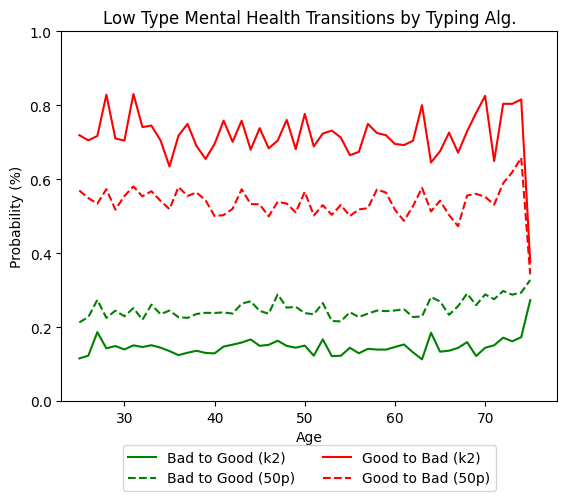

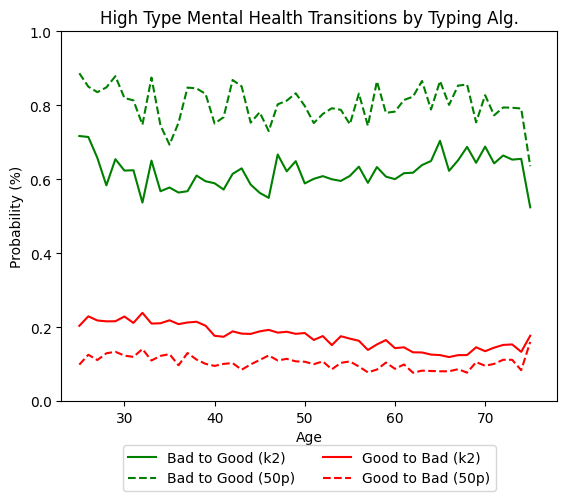

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Low Type Mental Health Transitions by Typing Alg.'}, xlabel='Age', ylabel='Probability (%)'>,
 <Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'High Type Mental Health Transitions by Typing Alg.'}, xlabel='Age', ylabel='Probability (%)'>)

In [7]:
trans_name = "MH_trans_by_MH_clust_k2_age"
dis_trans_path = trans_path + trans_name + ".csv" 
H_trans1 = io.read_and_shape_H_trans_full(myPars, dis_trans_path)

trans_name = "MH_trans_by_MH_clust_50p_age"
dis_trans_path = trans_path + trans_name + ".csv" 
H_trans2 = io.read_and_shape_H_trans_full(myPars, dis_trans_path)

myPars1 = Pars(main_path, J=51, H_trans=H_trans1)
myPars2 = Pars(main_path, J=51, H_trans=H_trans2)

plot_moments.plot_H_trans_H_type_alg(myPars1, myPars2, path=out_path)

In [8]:
import main
import pars_shocks as ps
import importlib
importlib.reload(main)

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
trans_path = main_path + "input/k-means/MH_trans_by_MH_clust_age.csv"
of_name = None
myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, 
                                                                    H_trans_path = trans_path, output_flag = False)

myPars_no_cost = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_no_cost.phi_H = 0.0
myPars_no_cost, myShocks_no_cost, sols_no_cost, sims_no_cost = main.main_io(main_path, out_folder_name = of_name, 
                                                                            H_trans_path = trans_path,
                                                                            myPars = myPars_no_cost, myShocks=myShocks_bench, 
                                                                            output_flag = False)

myPars_no_wH = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_no_wH.wH_coeff = 0.0
myPars_no_wH, myShocks_no_wH, sols_no_wH, sims_no_wH = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path,
                                                                    myPars = myPars_no_wH, myShocks=myShocks_bench, 
                                                                    output_flag = False, do_wH_calib = False)

myPars_all_high_H_types = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_all_high_H_types.H_type_perm_weights = np.array([0.0, 1.0])
(myPars_all_high_H_types, myShocks_all_high_H_types, 
    sols_all_high_H_types, sims_all_high_H_types) = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path,
                                                                    myPars = myPars_all_high_H_types, myShocks=myShocks_bench, 
                                                                                                    output_flag = False)

myPars_no_MH = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_no_MH.phi_H = 0.0
myPars_no_MH.wH_coeff = 0.0
myPars_no_MH, myShocks_no_MH, sols_no_MH, sims_no_MH = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path,
                                                                    myPars = myPars_no_MH, myShocks=myShocks_bench,
                                                                    output_flag = False, do_wH_calib = False)


print("myPars_bench")
print(f"phi_H: {myPars_bench.phi_H}, wH_coeff: {myPars_bench.wH_coeff}, H_type_perm_weights: {myPars_bench.H_type_perm_weights}")
print("myPars_no_cost")
print(f"phi_H: {myPars_no_cost.phi_H}, wH_coeff: {myPars_no_cost.wH_coeff}, H_type_perm_weights: {myPars_no_cost.H_type_perm_weights}")
print("myPars_no_wH")
print(f"phi_H: {myPars_no_wH.phi_H}, wH_coeff: {myPars_no_wH.wH_coeff}, H_type_perm_weights: {myPars_no_wH.H_type_perm_weights}")
print("myPars_all_high_H_types")
print(f"phi_H: {myPars_all_high_H_types.phi_H}, wH_coeff: {myPars_all_high_H_types.wH_coeff}, H_type_perm_weights: {myPars_all_high_H_types.H_type_perm_weights}")
print("myPars_no_MH")
print(f"phi_H: {myPars_no_MH.phi_H}, wH_coeff: {myPars_no_MH.wH_coeff}, H_type_perm_weights: {myPars_no_MH.H_type_perm_weights}")



*****Running main_io with default out_folder_name*****
Solver ran in 0.6159096999908797 seconds
Calibrating with alpha_lab_targ = 0.30498119901960785, w0_mean_targ = 12.664071, w0_sd_targ = 3.1353517, w1_targ = 0.25679965942280614, w2_targ = 0.2029180155568051, wH_targ = 0.028003097
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 *****
***** Calibration iteration 9 *****
***** Calibration iteration 10 *****
Calibration converged after 11 iterations
w0_weights = [0.0488244  0.42637316 0.50884739 0.01595506], w0_mean = 12.664076077454855, w0_mean_targ = 12.664071, w0_sd = 3.1353496777849, w0_sd_targ = 3.1353517
 w1 = 0.0194549560546875, w1 moment = 0.25684003655904597, w1 mom targ = 0.25679965942280614,
                   

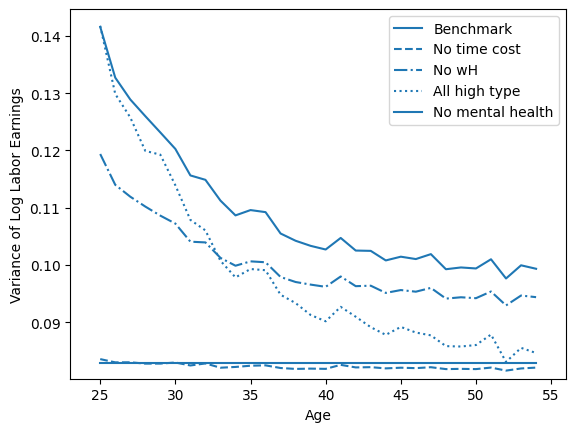

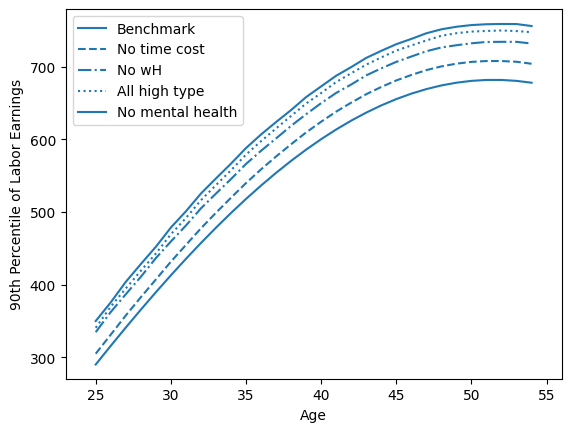

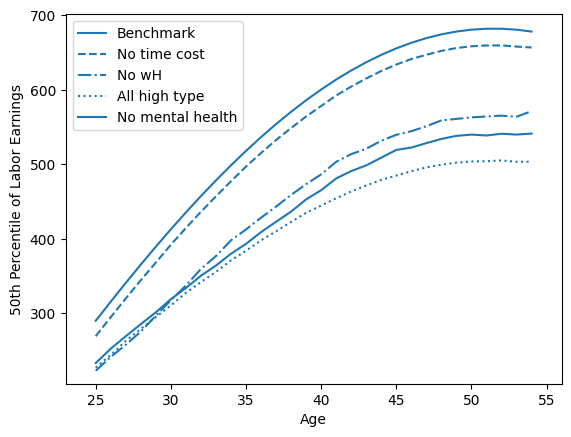

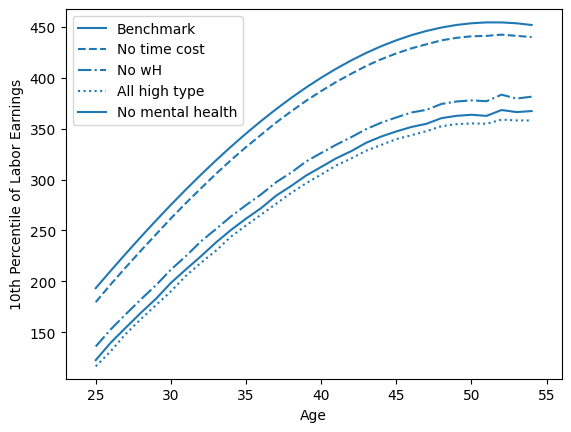

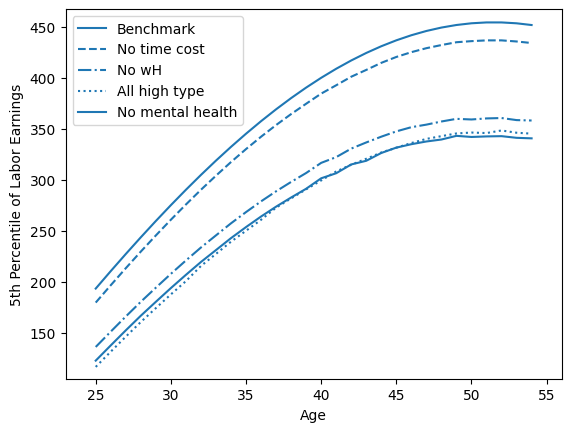

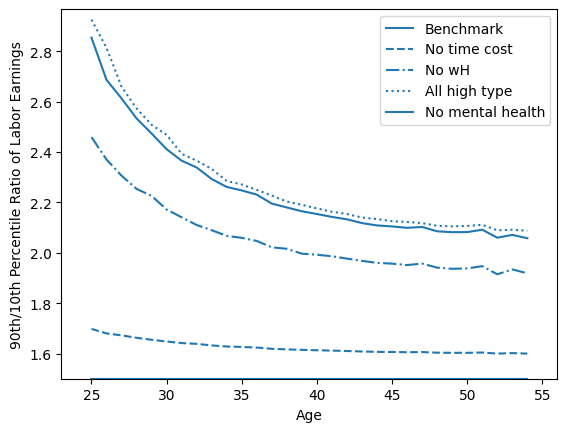

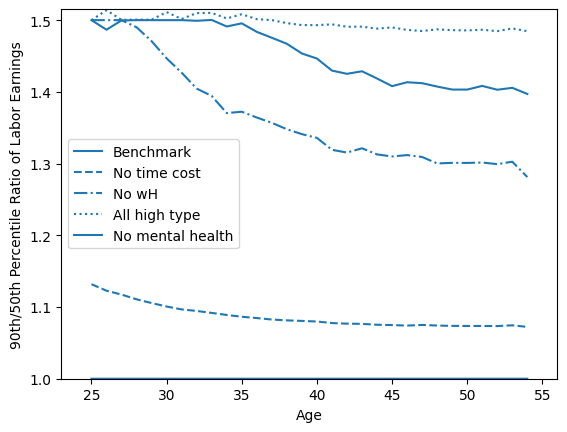

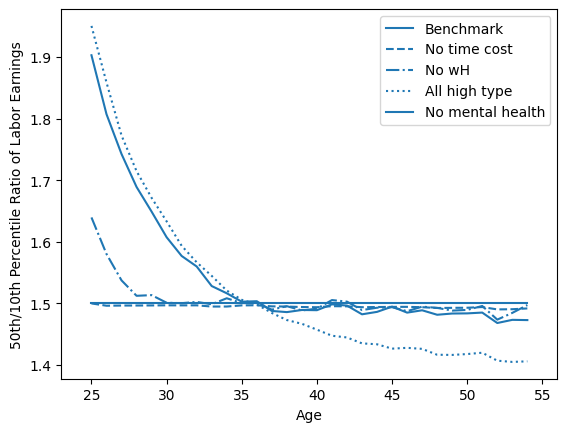

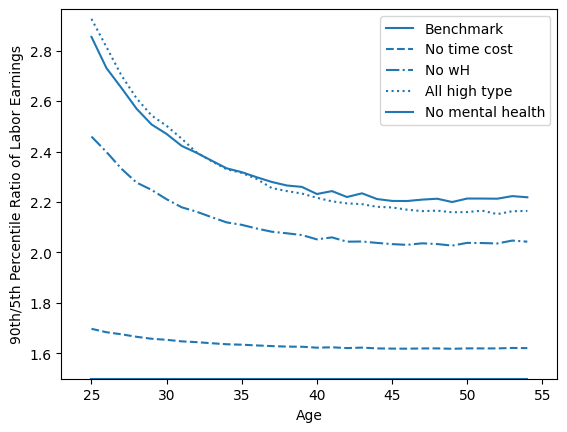

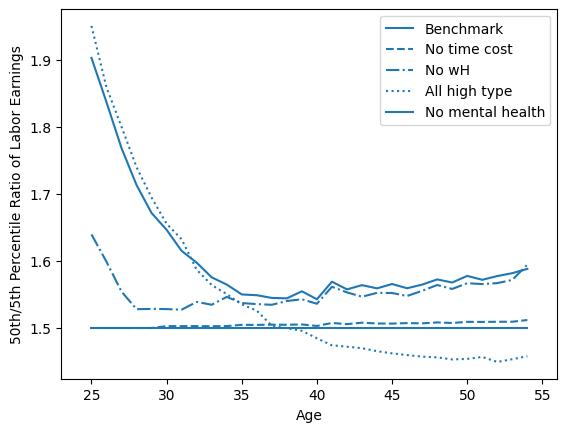

In [24]:
import plot_inequality as plot_ineq
import matplotlib
importlib.reload(tb)
importlib.reload(plot_ineq)

quietly = True
y_label_root = "Labor Earnings"
y_axis_label_var = "Variance of Log" + " " + y_label_root
my_label_lists = [["Benchmark"], ["No time cost"], ["No wH"], ["All high type"],["No mental health"]]

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench,sims_bench["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_no_cost, ax_var_no_cost = plot_ineq.plot_var_log_sim(myPars_no_cost, sims_no_cost["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, sims_no_wH["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, sims_all_high_H_types["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_no_MH, ax_var_no_MH = plot_ineq.plot_var_log_sim(myPars_no_MH, sims_no_MH["lab_earnings"], y_axis_label_var, out_path, quietly)

bench_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_bench, sims_bench["lab_earnings"], y_label_root, out_path, quietly)
no_cost_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_cost, sims_no_cost["lab_earnings"], y_label_root, out_path, quietly)
no_wH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_wH, sims_no_wH["lab_earnings"], y_label_root, out_path, quietly)
all_high_H_types_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_all_high_H_types, sims_all_high_H_types["lab_earnings"], y_label_root, out_path, quietly)
no_MH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_MH, sims_no_MH["lab_earnings"], y_label_root, out_path, quietly)

# bench_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_bench, np.log(np.where(sims_bench["lab_earnings"]>0,sims_bench["lab_earnings"],1e-3)), y_label_root, out_path, quietly)
# no_cost_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_cost, np.log(np.where(sims_no_cost["lab_earnings"]>0,sims_no_cost["lab_earnings"],1e-3)), y_label_root, out_path, quietly)
# no_wH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_wH, np.log(np.where(sims_no_wH["lab_earnings"]>0,sims_no_wH["lab_earnings"],1e-3)), y_label_root, out_path, quietly)
# all_high_H_types_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_all_high_H_types, np.log(np.where(sims_all_high_H_types["lab_earnings"]>0,sims_all_high_H_types["lab_earnings"],1e-3)), y_label_root, out_path, quietly)
# no_MH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_MH, np.log(np.where(sims_no_MH["lab_earnings"]>0,sims_no_MH["lab_earnings"],1e-3)), y_label_root, out_path, quietly)

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
plot_save_path = main_path + "trans_output_test/" + "my_combined_plot" + ".pdf"
plot_save_path1 = main_path + "trans_output_test/" + "my_combined_plot1" + ".pdf"
combined_plot_list = []


# fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), (fig_var_no_cost, ax_var_no_cost)], label_lists = my_label_lists)
# fig.savefig(plot_save_path1)

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), 
                  (fig_var_no_cost, ax_var_no_cost), (fig_var_no_wH, ax_var_no_wH), 
                  (fig_var_all_high_H_types, ax_var_all_high_H_types), (fig_var_no_MH, ax_var_no_MH)], 
                    save_path = plot_save_path, label_lists = my_label_lists, quietly = True)


# fig.savefig(plot_save_path)
# plt.show()
# tb.save_plot(combined_plot_list[0][0], plot_save_path)


for i in range(len(bench_perc_plot_list)):
    combined_plot_list.append(tb.combine_plots([bench_perc_plot_list[i], 
                    no_cost_perc_plot_list[i], no_wH_perc_plot_list[i], 
                    all_high_H_types_perc_plot_list[i], no_MH_perc_plot_list[i]], 
                    label_lists = my_label_lists, quietly = True))



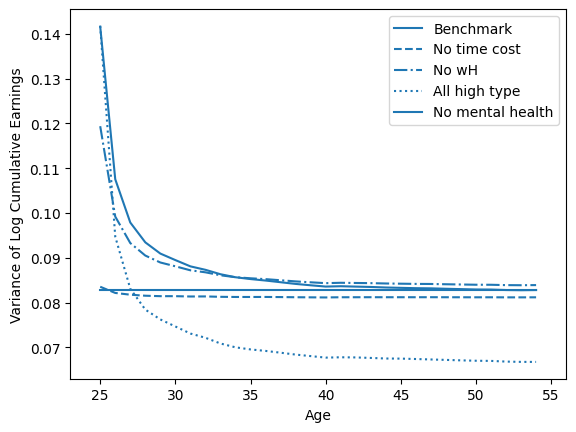

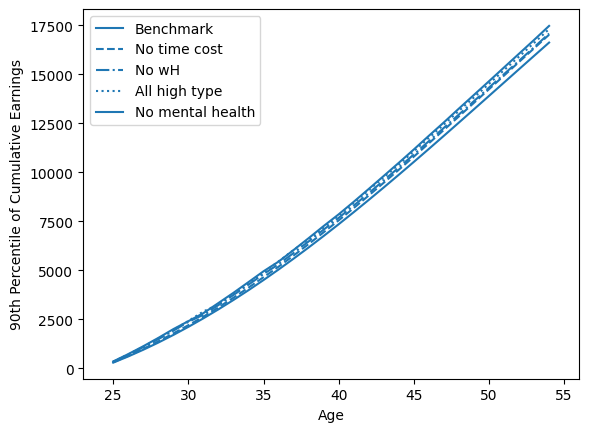

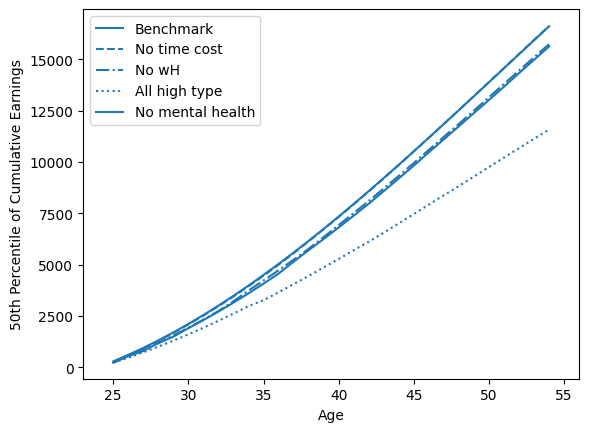

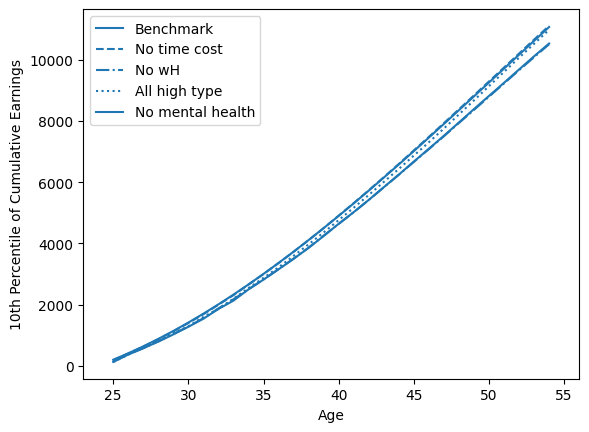

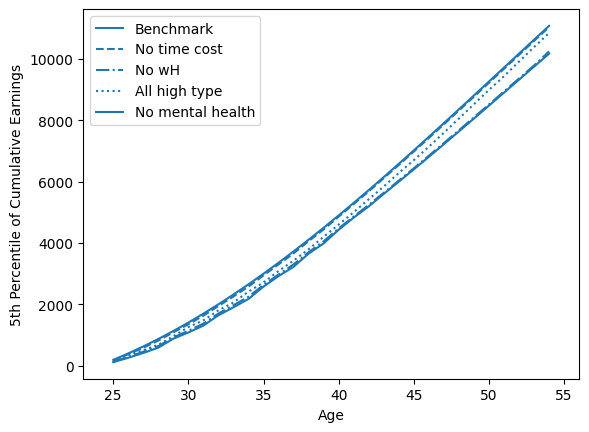

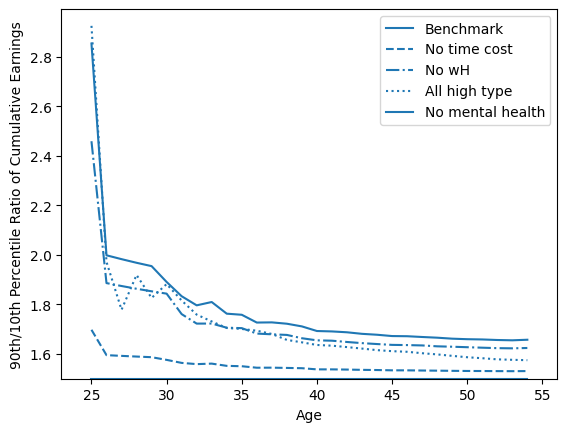

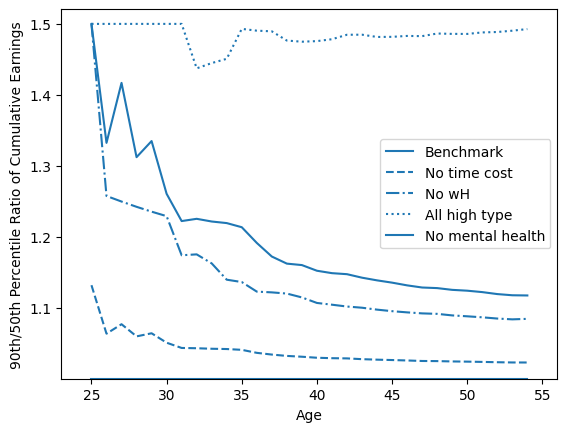

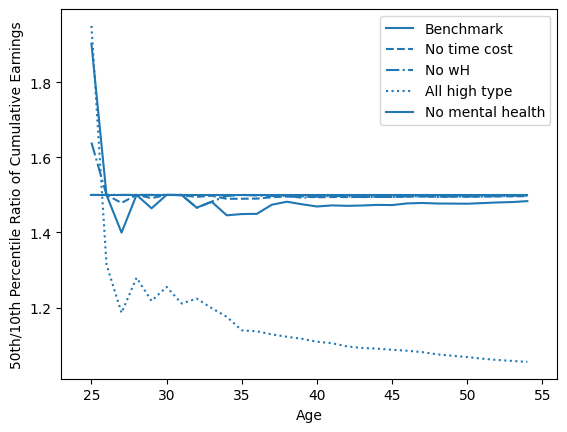

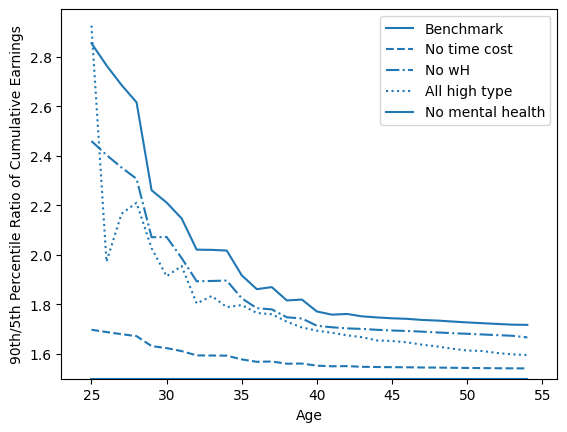

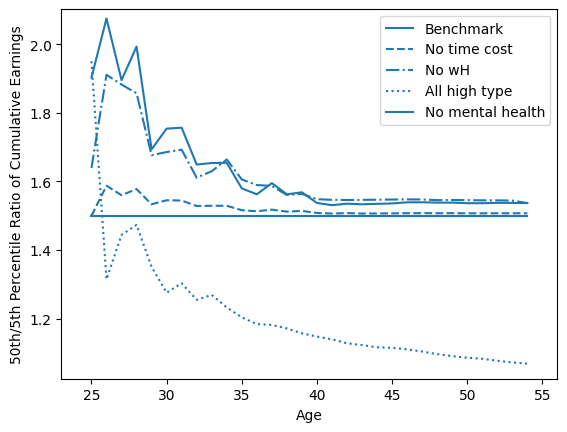

In [25]:
quietly = True
y_label_root = "Cumulative Earnings"
y_axis_label_var = "Variance of Log" + " " + y_label_root
my_label_lists = [["Benchmark"], ["No time cost"], ["No wH"], ["All high type"],["No mental health"]]

def cum_sum_by_last_dim(array: np.ndarray) -> np.ndarray:
    cum_sum = np.cumsum(array, axis=array.ndim-1)
    return cum_sum

cum_sims_bench = {key: cum_sum_by_last_dim(sims_bench[key]) for key in sims_bench}
cum_sims_no_cost = {key: cum_sum_by_last_dim(sims_no_cost[key]) for key in sims_no_cost}
cum_sims_no_wH = {key: cum_sum_by_last_dim(sims_no_wH[key]) for key in sims_no_wH}
cum_sims_all_high_H_types = {key: cum_sum_by_last_dim(sims_all_high_H_types[key]) for key in sims_all_high_H_types}
cum_sims_no_MH = {key: cum_sum_by_last_dim(sims_no_MH[key]) for key in sims_no_MH}

for key in cum_sims_bench:
    cum_sims_bench[key] = cum_sum_by_last_dim(sims_bench[key])
    cum_sims_no_cost[key] = cum_sum_by_last_dim(sims_no_cost[key])
    cum_sims_no_wH[key] = cum_sum_by_last_dim(sims_no_wH[key])
    cum_sims_all_high_H_types[key] = cum_sum_by_last_dim(sims_all_high_H_types[key])
    cum_sims_no_MH[key] = cum_sum_by_last_dim(sims_no_MH[key])

fig_var_cum_bench, ax_var_cum_bench = plot_ineq.plot_var_log_sim(myPars_bench, cum_sims_bench["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_cum_no_cost, ax_var_cum_no_cost = plot_ineq.plot_var_log_sim(myPars_no_cost, cum_sims_no_cost["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_cum_no_wH, ax_var_cum_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, cum_sims_no_wH["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_cum_all_high_H_types, ax_var_cum_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, cum_sims_all_high_H_types["lab_earnings"], y_axis_label_var, out_path, quietly)
fig_var_cum_no_MH, ax_var_cum_no_MH = plot_ineq.plot_var_log_sim(myPars_no_MH, cum_sims_no_MH["lab_earnings"], y_axis_label_var, out_path, quietly)
tb.combine_plots([(fig_var_cum_bench, ax_var_cum_bench), (fig_var_cum_no_cost, ax_var_cum_no_cost), (fig_var_cum_no_wH, ax_var_cum_no_wH),
                    (fig_var_cum_all_high_H_types, ax_var_cum_all_high_H_types), (fig_var_cum_no_MH, ax_var_cum_no_MH)],
                    label_lists = my_label_lists)

cum_bench_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_bench, cum_sims_bench["lab_earnings"], y_label_root, out_path, quietly)
cum_no_cost_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_cost, cum_sims_no_cost["lab_earnings"], y_label_root, out_path, quietly)
cum_no_wH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_wH, cum_sims_no_wH["lab_earnings"], y_label_root, out_path, quietly)
cum_all_high_H_types_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_all_high_H_types, cum_sims_all_high_H_types["lab_earnings"], y_label_root, out_path, quietly)
cum_no_MH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_MH, cum_sims_no_MH["lab_earnings"], y_label_root, out_path, quietly)

# cum_bench_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_bench, np.log(cum_sims_bench["lab_earnings"]), y_label_root, out_path, quietly)
# cum_no_cost_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_cost, np.log(cum_sims_no_cost["lab_earnings"]), y_label_root, out_path, quietly)
# cum_no_wH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_wH, np.log(cum_sims_no_wH["lab_earnings"]), y_label_root, out_path, quietly)
# cum_all_high_H_types_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_all_high_H_types, np.log(cum_sims_all_high_H_types["lab_earnings"]), y_label_root, out_path, quietly)
# cum_no_MH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_MH, np.log(cum_sims_no_MH["lab_earnings"]), y_label_root, out_path, quietly)

for i in range(len(cum_bench_perc_plot_list)):
    fig, ax = tb.combine_plots([cum_bench_perc_plot_list[i], cum_no_cost_perc_plot_list[i], cum_no_wH_perc_plot_list[i], cum_all_high_H_types_perc_plot_list[i], cum_no_MH_perc_plot_list[i]], 
                    label_lists = my_label_lists)
    plot_save_path = out_path + f"my_combined_plot{i}.pdf"
    fig.savefig(plot_save_path, bbox_inches='tight')